A continuacion se importan las librerias para analizar el conjutno de datos


In [3]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix 

import warnings

# Ignore warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv('customer_segmentation.csv')

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.shape

(2240, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<style>
    table {
        border-collapse: collapse;
        width: 100%;
        border: 2px solid #008CBA;
        margin-bottom: 20px;
    }

    th, td {
        border: 1px solid #008CBA;
        padding: 10px;
        text-align: left;
    }

    th {
        background-color: #008CBA;
        color: white;
    }

    h2 {
        color: #008CBA;
    }
</style>

#### <span style="color:#008CBA;">Variables Numéricas (`int64`):</span>

<table>
    <tr>
        <th>Variable</th>
        <th>Descripción</th>
    </tr>
    <tr>
        <td>FECHA_CORTE</td>
        <td>Día en que se generó el DATASET</td>
    </tr>
    <tr>
        <td>ANNIO_POSTULACION</td>
        <td>Año del proceso de admisión</td>
    </tr>
    <tr>
        <td>UBIGEO</td>
        <td>Código de ubicación geográfica donde nació el postulante</td>
    </tr>
    <tr>
        <td>UBIGEO_ORIGEN</td>
        <td>Código de ubicación geográfica donde vive el postulante</td>
    </tr>
    <tr>
        <td>UBIGEO_IE</td>
        <td>Código de ubicación geográfica donde culminó sus estudios el postulante</td>
    </tr>
    <tr>
        <td>EDAD</td>
        <td>Número que identifica la edad del postulante en la fecha que postuló</td>
    </tr>
    <tr>
        <td>PAGO</td>
        <td>Monto del pago que realizó el postulante para dar el examen de admisión</td>
    </tr>
</table>

#### <span style="color:#008CBA;">Variables de Categorías (`object`):</span>

<table>
    <tr>
        <th>Variable</th>
        <th>Descripción</th>
    </tr>
    <tr>
        <td>UUID</td>
        <td>Documento Nacional de Identidad del alumno que postuló, anonimizado</td>
    </tr>
    <tr>
        <td>ESCUELA</td>
        <td>Escuela Profesional a la que postuló el alumno</td>
    </tr>
    <tr>
        <td>MODALIDAD</td>
        <td>Modalidad de Postulación</td>
    </tr>
    <tr>
        <td>DEPARTAMENTO</td>
        <td>Nombre del departamento donde nació el postulante</td>
    </tr>
    <tr>
        <td>PROVINCIA</td>
        <td>Nombre de la provincia donde nació el postulante</td>
    </tr>
    <tr>
        <td>DISTRITO</td>
        <td>Nombre del distrito donde nació el postulante</td>
    </tr>
    <tr>
        <td>DEPARTAMENTO_ORIGEN</td>
        <td>Nombre del departamento donde vive el postulante</td>
    </tr>
    <tr>
        <td>PROVINCIA_ORIGEN</td>
        <td>Nombre de la provincia donde vive el postulante</td>
    </tr>
    <tr>
        <td>DISTRITO_ORIGEN</td>
        <td>Nombre del distrito donde vive el postulante</td>
    </tr>
    <tr>
        <td>DEPARTAMENTO_IE</td>
        <td>Nombre del departamento donde culminó sus estudios el postulante</td>
    </tr>
    <tr>
        <td>PROVINCIA_IE</td>
        <td>Nombre de la provincia donde culminó sus estudios el postulante</td>
    </tr>
    <tr>
        <td>DISTRITO_IE</td>
        <td>Nombre del distrito donde culminó sus estudios el postulante</td>
    </tr>
    <tr>
        <td>SEXO</td>
        <td>Descripción del sexo del postulante</td>
    </tr>
    <tr>
        <td>IDIOMA</td>
        <td>Segunda lengua del estudiante</td>
    </tr>
    <tr>
        <td>LEE</td>
        <td>Lee la segunda lengua</td>
    </tr>
    <tr>
        <td>ESCRIBE</td>
        <td>Escribe la segunda lengua</td>
    </tr>
    <tr>
        <td>HABLA</td>
        <td>Habla la segunda lengua</td>
    </tr>
    <tr>
        <td>TIENE_DISCAPACIDAD</td>
        <td>Si el postulante tiene alguna discapacidad</td>
    </tr>
    <tr>
        <td>TIPO_COMUNIDAD</td>
        <td>Tipo de comunidad a la cual pertenece el postulante</td>
    </tr>
    <tr>
        <td>COMUNIDAD</td>
        <td>Comunidad específica a la cual pertenece el postulante</td>
    </tr>
</table>


<div style="background-color:#20B2AA; border-radius:10px; padding:15px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <h3 style="color:#191970;">📊 Descripción del conjunto de datos</h3>
    <p style="color:#555555;">Esta sección proporciona una descripción del conjunto de datos:</p>
</div>


## tratado de valores nulos

In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#trataremos con la mediana a los valores faltantes

In [9]:
df['Income'].fillna(df['Income'].median(), inplace = True)

In [10]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### Imputacion de valores nulos


In [11]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
dates = []

for i in df['Dt_Customer']:
  i = i.date()
  dates.append(i)

#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [12]:
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [13]:
df['Age_on_2014'] = 2014 - df['Year_Birth']

In [14]:
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [15]:
df['Living_with'] = df['Marital_Status'].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})

In [16]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [17]:
df['Family_size'] = df['Living_with'].replace({"Alone": 1, "Partner": 2}) + df['Children']

In [18]:
df['Is_parent'] = np.where(df.Children > 0, 1, 0)

In [19]:
df['Education'] = df['Education'].replace({"Basic":"Undergraduate", "2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [20]:
# For clarity
df =df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [21]:
df = df.drop(columns = ['Marital_Status', 'Dt_Customer', 'ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue'], axis = 1)

In [22]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age_on_2014,Spent,Living_with,Children,Family_size,Is_parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,57,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,60,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,49,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,30,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,33,422,Partner,1,3,1


In [23]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age_on_2014,Spent,Children,Family_size,Is_parent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,0.072768,0.064286,0.013393,0.009375,0.149107,45.194196,605.798214,0.950446,2.595089,0.715179
std,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,602.249288,0.751803,0.906959,0.451430
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000,1.000000,0.000000
25%,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,68.750000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,396.000000,1.000000,3.000000,1.000000
75%,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,1045.500000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,121.000000,2525.000000,3.000000,5.000000,1.000000


In [24]:
df = df[(df["Age_on_2014"]<90)]
df = df[(df["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2236


In [25]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age_on_2014',
       'Spent', 'Living_with', 'Children', 'Family_size', 'Is_parent'],
      dtype='object')

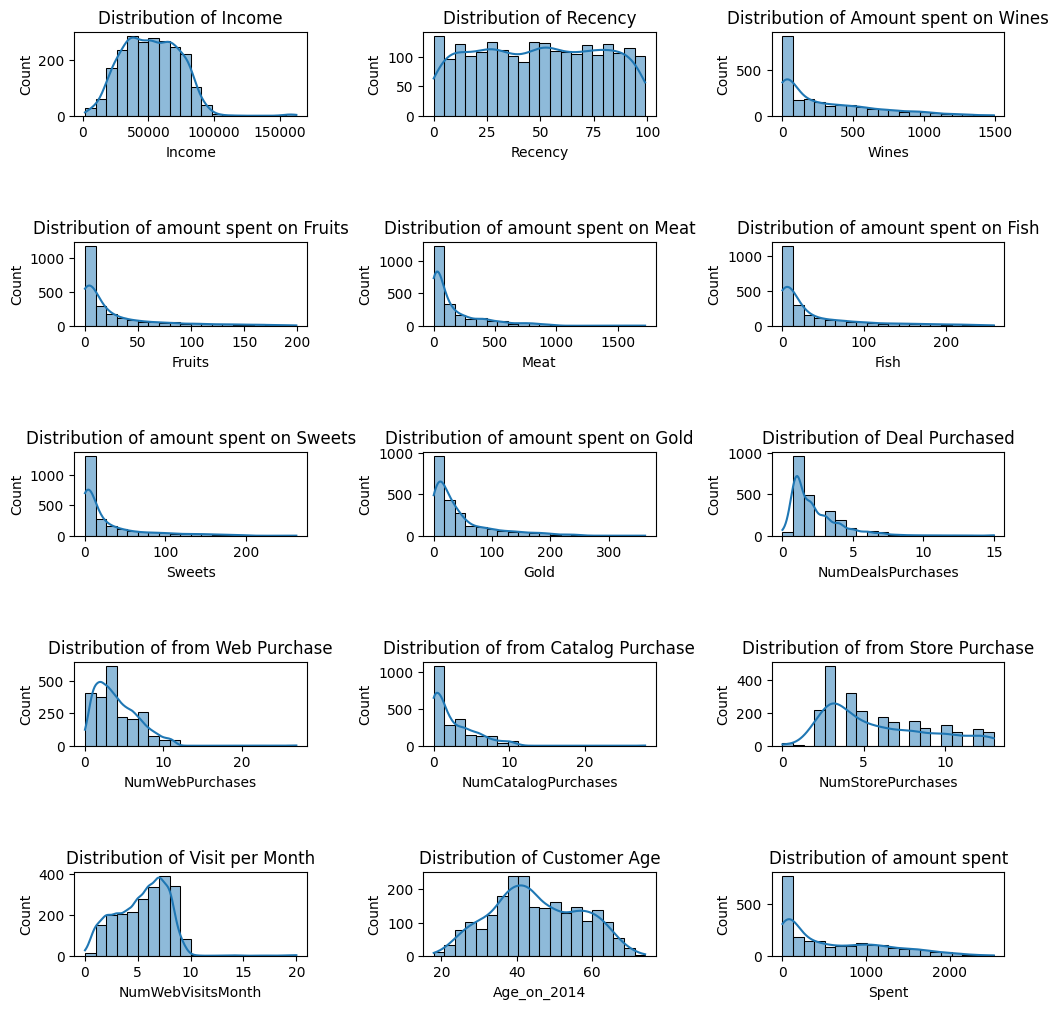

In [26]:
plt.figure(figsize = (12, 12))
plt.subplots_adjust(hspace = 1.5, wspace=0.5)

plt.subplot(5, 3, 1)
sns.histplot(df, x = 'Income', kde = True, bins = 20)
plt.title("Distribution of Income")

plt.subplot(5, 3, 2)
sns.histplot(df, x = 'Recency', kde = True, bins = 20)
plt.title("Distribution of Recency")

plt.subplot(5, 3, 3)
sns.histplot(df, x = "Wines", kde = True, bins = 20)
plt.title("Distribution of Amount spent on Wines")

plt.subplot(5, 3, 4)
sns.histplot(df, x = 'Fruits', kde = True, bins = 20)
plt.title("Distribution of amount spent on Fruits")

plt.subplot(5, 3, 5)
sns.histplot(df, x = 'Meat', kde = True, bins = 20)
plt.title("Distribution of amount spent on Meat")

plt.subplot(5, 3, 6)
sns.histplot(df, x = 'Fish', kde = True, bins = 20)
plt.title("Distribution of amount spent on Fish")

plt.subplot(5, 3, 7)
sns.histplot(df, x = 'Sweets', kde = True, bins = 20)
plt.title("Distribution of amount spent on Sweets")

plt.subplot(5, 3, 8)
sns.histplot(df, x = 'Gold', kde = True, bins = 20)
plt.title("Distribution of amount spent on Gold")

plt.subplot(5, 3, 9)
sns.histplot(df, x = 'NumDealsPurchases', kde = True, bins = 20)
plt.title("Distribution of Deal Purchased")

plt.subplot(5, 3, 10)
sns.histplot(df, x = 'NumWebPurchases', kde = True, bins = 20)
plt.title("Distribution of from Web Purchase")

plt.subplot(5, 3, 11)
sns.histplot(df, x = 'NumCatalogPurchases', kde = True, bins = 20)
plt.title("Distribution of from Catalog Purchase")

plt.subplot(5, 3, 12)
sns.histplot(df, x = 'NumStorePurchases', kde = True, bins = 20)
plt.title("Distribution of from Store Purchase")

plt.subplot(5, 3, 13)
sns.histplot(df, x = 'NumWebVisitsMonth', kde = True, bins = 20)
plt.title("Distribution of Visit per Month")

plt.subplot(5, 3, 14)
sns.histplot(df, x = 'Age_on_2014', kde = True, bins = 20)
plt.title("Distribution of Customer Age")

plt.subplot(5, 3, 15)
sns.histplot(df, x = 'Spent', kde = True, bins = 20)
plt.title("Distribution of amount spent")

plt.show()

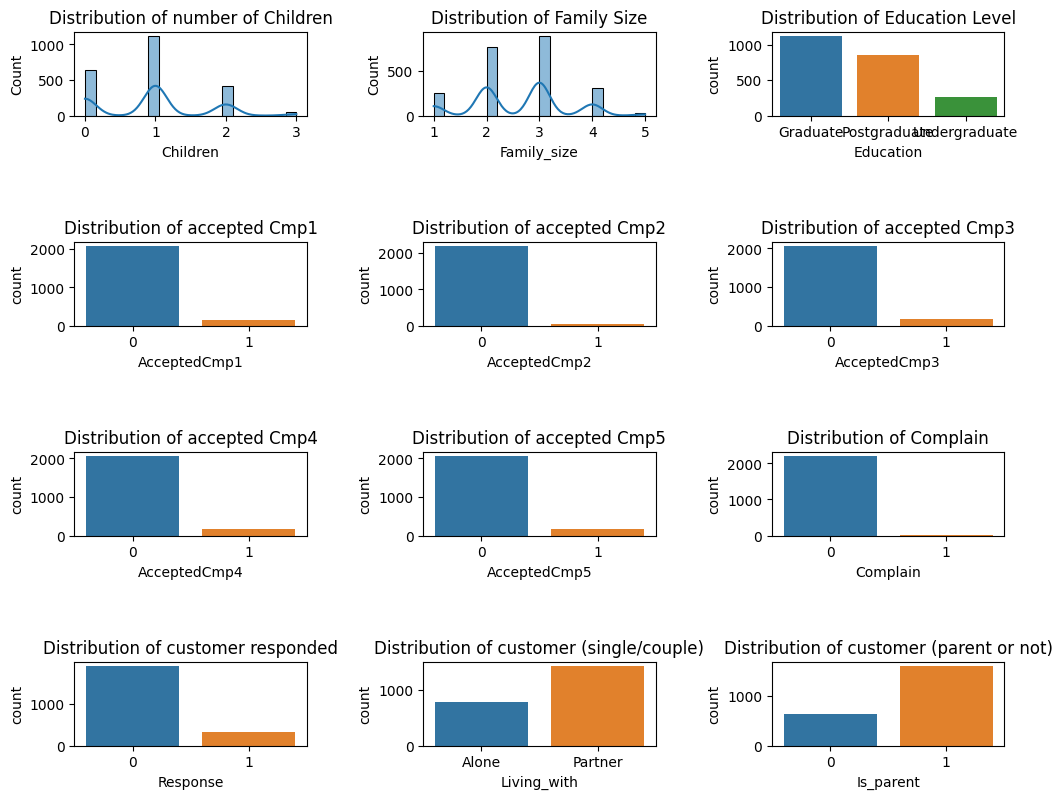

In [27]:
plt.figure(figsize = (12, 12))
plt.subplots_adjust(hspace = 1.5, wspace=0.5)

plt.subplot(5, 3, 1)
sns.histplot(df, x = 'Children', kde = True, bins = 20)
plt.title("Distribution of number of Children")

plt.subplot(5, 3, 2)
sns.histplot(df, x = 'Family_size', kde = True, bins = 20)
plt.title('Distribution of Family Size')

plt.subplot(5, 3, 3)
sns.countplot(df, x = 'Education')
plt.title("Distribution of Education Level")

plt.subplot(5, 3, 4)
sns.countplot(df, x = 'AcceptedCmp1')
plt.title("Distribution of accepted Cmp1")

plt.subplot(5, 3, 5)
sns.countplot(df, x = 'AcceptedCmp2')
plt.title("Distribution of accepted Cmp2")

plt.subplot(5, 3, 6)
sns.countplot(df, x = 'AcceptedCmp3')
plt.title("Distribution of accepted Cmp3")

plt.subplot(5, 3, 7)
sns.countplot(df, x = 'AcceptedCmp4')
plt.title("Distribution of accepted Cmp4")

plt.subplot(5, 3, 8)
sns.countplot(df, x = 'AcceptedCmp5')
plt.title("Distribution of accepted Cmp5")

plt.subplot(5, 3, 9)
sns.countplot(df, x = 'Complain')
plt.title('Distribution of Complain')

plt.subplot(5, 3, 10)
sns.countplot(df, x = 'Response')
plt.title('Distribution of customer responded')

plt.subplot(5, 3, 11)
sns.countplot(df, x = 'Living_with')
plt.title("Distribution of customer (single/couple)")

plt.subplot(5, 3, 12)
sns.countplot(df, x = 'Is_parent')
plt.title("Distribution of customer (parent or not)")

plt.show()

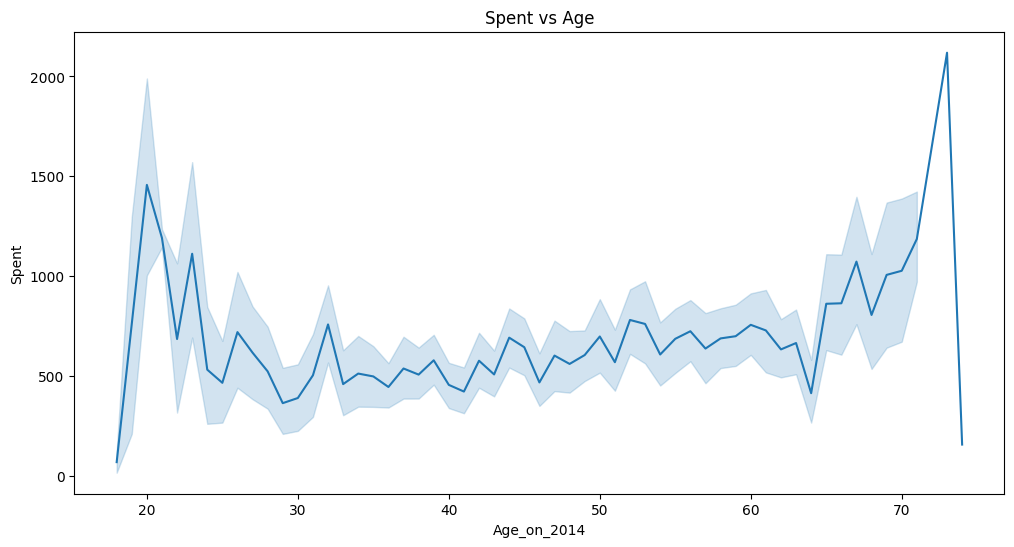


Correlation between Age_on_2014 and Spent: 0.11361767213727979


In [28]:
plt.figure(figsize = (12, 6))
sns.lineplot(df, x = 'Age_on_2014', y = 'Spent')
plt.title("Spent vs Age")
plt.show()
print(f"\nCorrelation between Age_on_2014 and Spent: {df['Age_on_2014'].corr(df['Spent'])}")

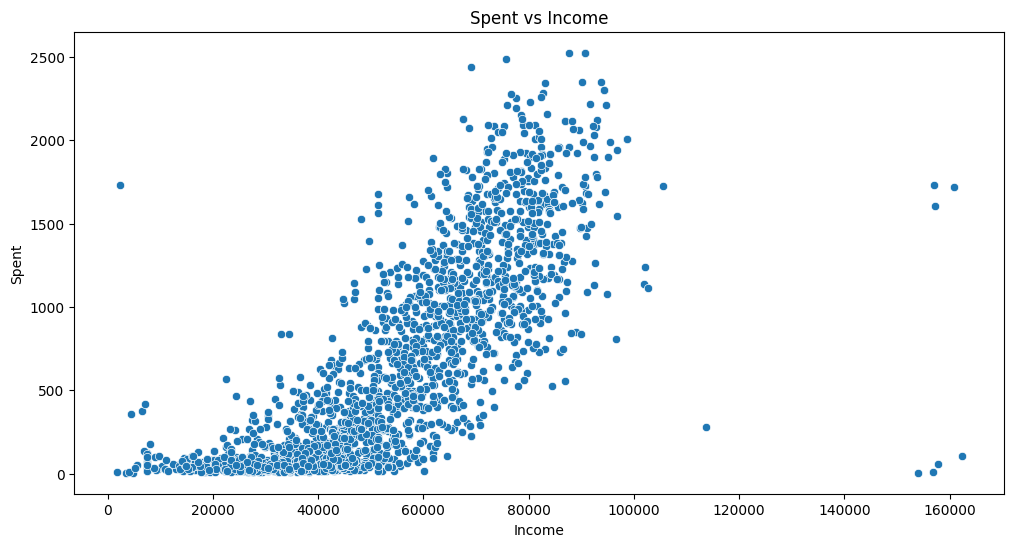


Correlation between Age_on_2014 and Spent: 0.7893749146446831


In [29]:
plt.figure(figsize = (12, 6))
sns.scatterplot(df, x = 'Income', y = 'Spent')
plt.title("Spent vs Income")
plt.grid(False)
plt.show()
print(f"\nCorrelation between Age_on_2014 and Spent: {df['Income'].corr(df['Spent'])}")

In [30]:
# Check how many categorical variables are present in data
a = (df.dtypes == 'object')
object_cols = list(a[a].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_with']


In [31]:
# Convert to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for i in object_cols:
  df[i] = df[[i]].apply(LE.fit_transform)

In [32]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age_on_2014,Spent,Living_with,Children,Family_size,Is_parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,57,1617,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,60,27,0,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,49,776,1,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,30,53,1,1,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,33,422,1,1,3,1


## MATRIZ DE CORRELACION


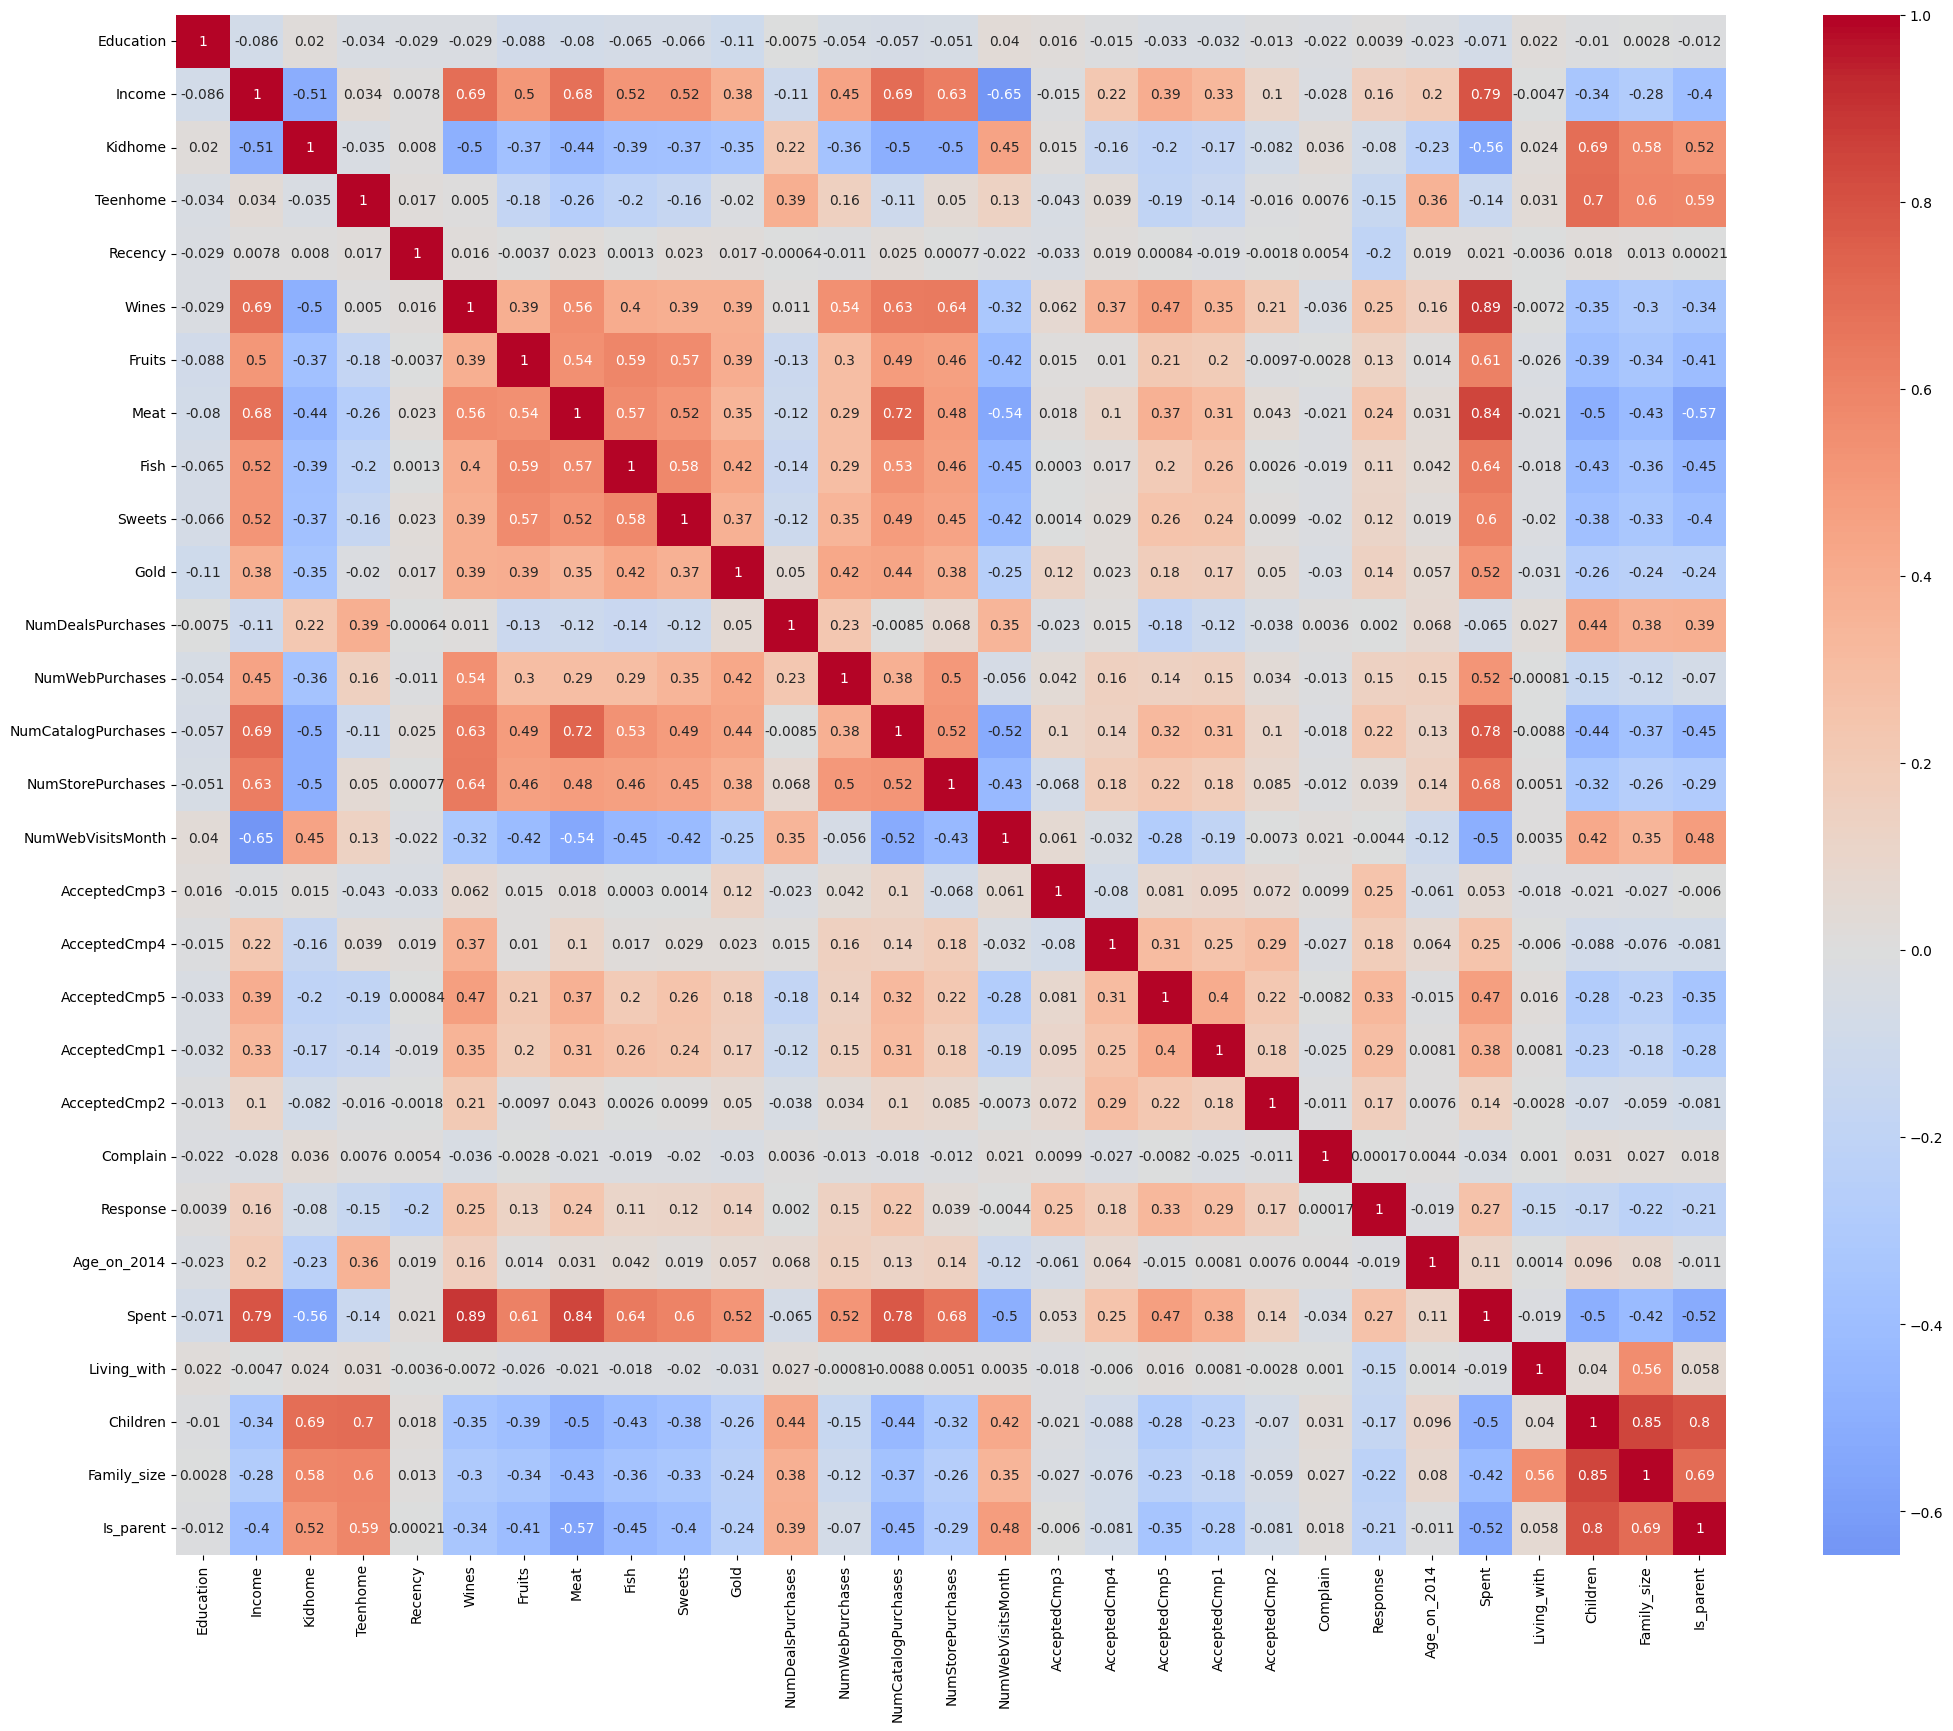

In [33]:
corrmax = df.corr()
plt.figure(figsize = (25, 20))
sns.heatmap(corrmax, annot = True, cmap = 'coolwarm', center = 0)
plt.show()

La variable 'IDIOMA_CODIFICADO' tiene una correlación positiva más fuerte con las siguientes variables:

PAGO: 0.651244
TIPO_COMUNIDAD: 0.494760
MODALIDAD_CODIFICADA: 0.431830
DISTRITO_ORIGEN: 0.351687
DISTRITO_IE: 0.332492
DISTRITO: 0.296624
LEE: 0.078223
ESCRIBE: 0.067700


# DATASET PREPROCESADO


#### MATRIZ DE CORRELACION UTILIZANDO LA CORRELACION DE PEARSON PARA CADA GRAFO



In [34]:
# Crear un diccionario para almacenar la matriz de correlación
matrices_correlacion = {}

# Crear un DataFrame para almacenar la similitud
similarity_df = None

# Obtener solo las columnas numéricas (excluyendo la primera columna sin identificador)
numeric_columns = df.iloc[:, 1:]

# Calcular la matriz de correlación de Pearson entre las filas
correlation_matrix = numeric_columns.T.corr(method="pearson")

# Almacenar la matriz de correlación en el diccionario
matrices_correlacion = correlation_matrix

# Obtener solo la parte triangular superior de la matriz de correlación
upper_triangle = np.triu(correlation_matrix, k=1)

# Crear un DataFrame para la matriz de similitud
column_names = numeric_columns.index.tolist()
similarity_df = pd.DataFrame(upper_triangle, columns=column_names, index=column_names)


# creamos los grafos apartir de la matriz de correlacion 


In [35]:
import networkx as nx
import numpy as np

# Crear un grafo
G = nx.Graph()

# Obtener los nombres de las variables (nodos)
variables = correlation_matrix.columns.tolist()

# Agregar nodos al grafo
G.add_nodes_from(variables)

# Definir el umbral de similitud
th = 0.95

# Crear un conjunto para rastrear las aristas ya agregadas
added_edges = set()

# Agregar aristas al grafo con los valores de similitud sin repeticiones
for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        # Filtro con el Threshold
        if abs(correlation_matrix.iloc[i, j]) >= th:
            # Ordenar nodos para asegurarse de que estén en el mismo orden
            nodes = tuple(sorted([variables[i], variables[j]]))
            if nodes not in added_edges:
                dist = 1 - correlation_matrix.iloc[i, j]
                G.add_edge(*nodes, weight=dist)
                added_edges.add(nodes)

# Ahora tienes un grafo G que representa la correlación entre las variables del DataFrame actual.


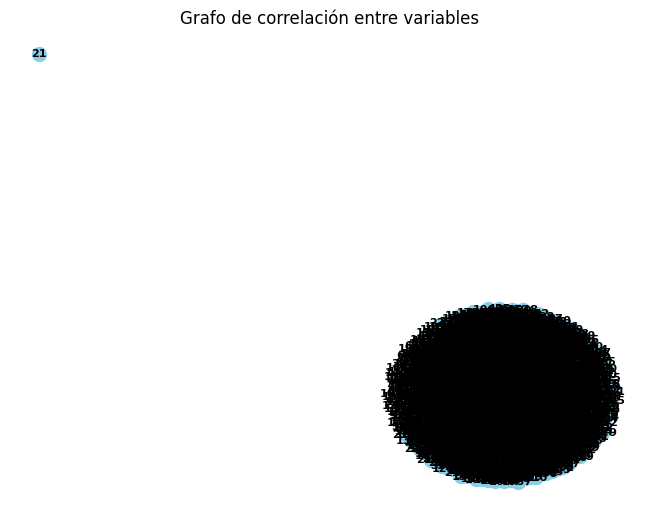

In [36]:
import matplotlib.pyplot as plt

# Crear una disposición de nodos para la visualización
pos = nx.spring_layout(G, seed=42)

# Obtener los pesos de las aristas para ajustar el ancho de las aristas en la visualización
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]

# Crear el grafo utilizando la disposición de nodos y los pesos de las aristas
nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=8, font_color='black',
        width=edge_weights, edge_color='gray', font_weight='bold')

# Ajustar el tamaño del gráfico y mostrar el grafo
plt.title("Grafo de correlación entre variables")
plt.show()


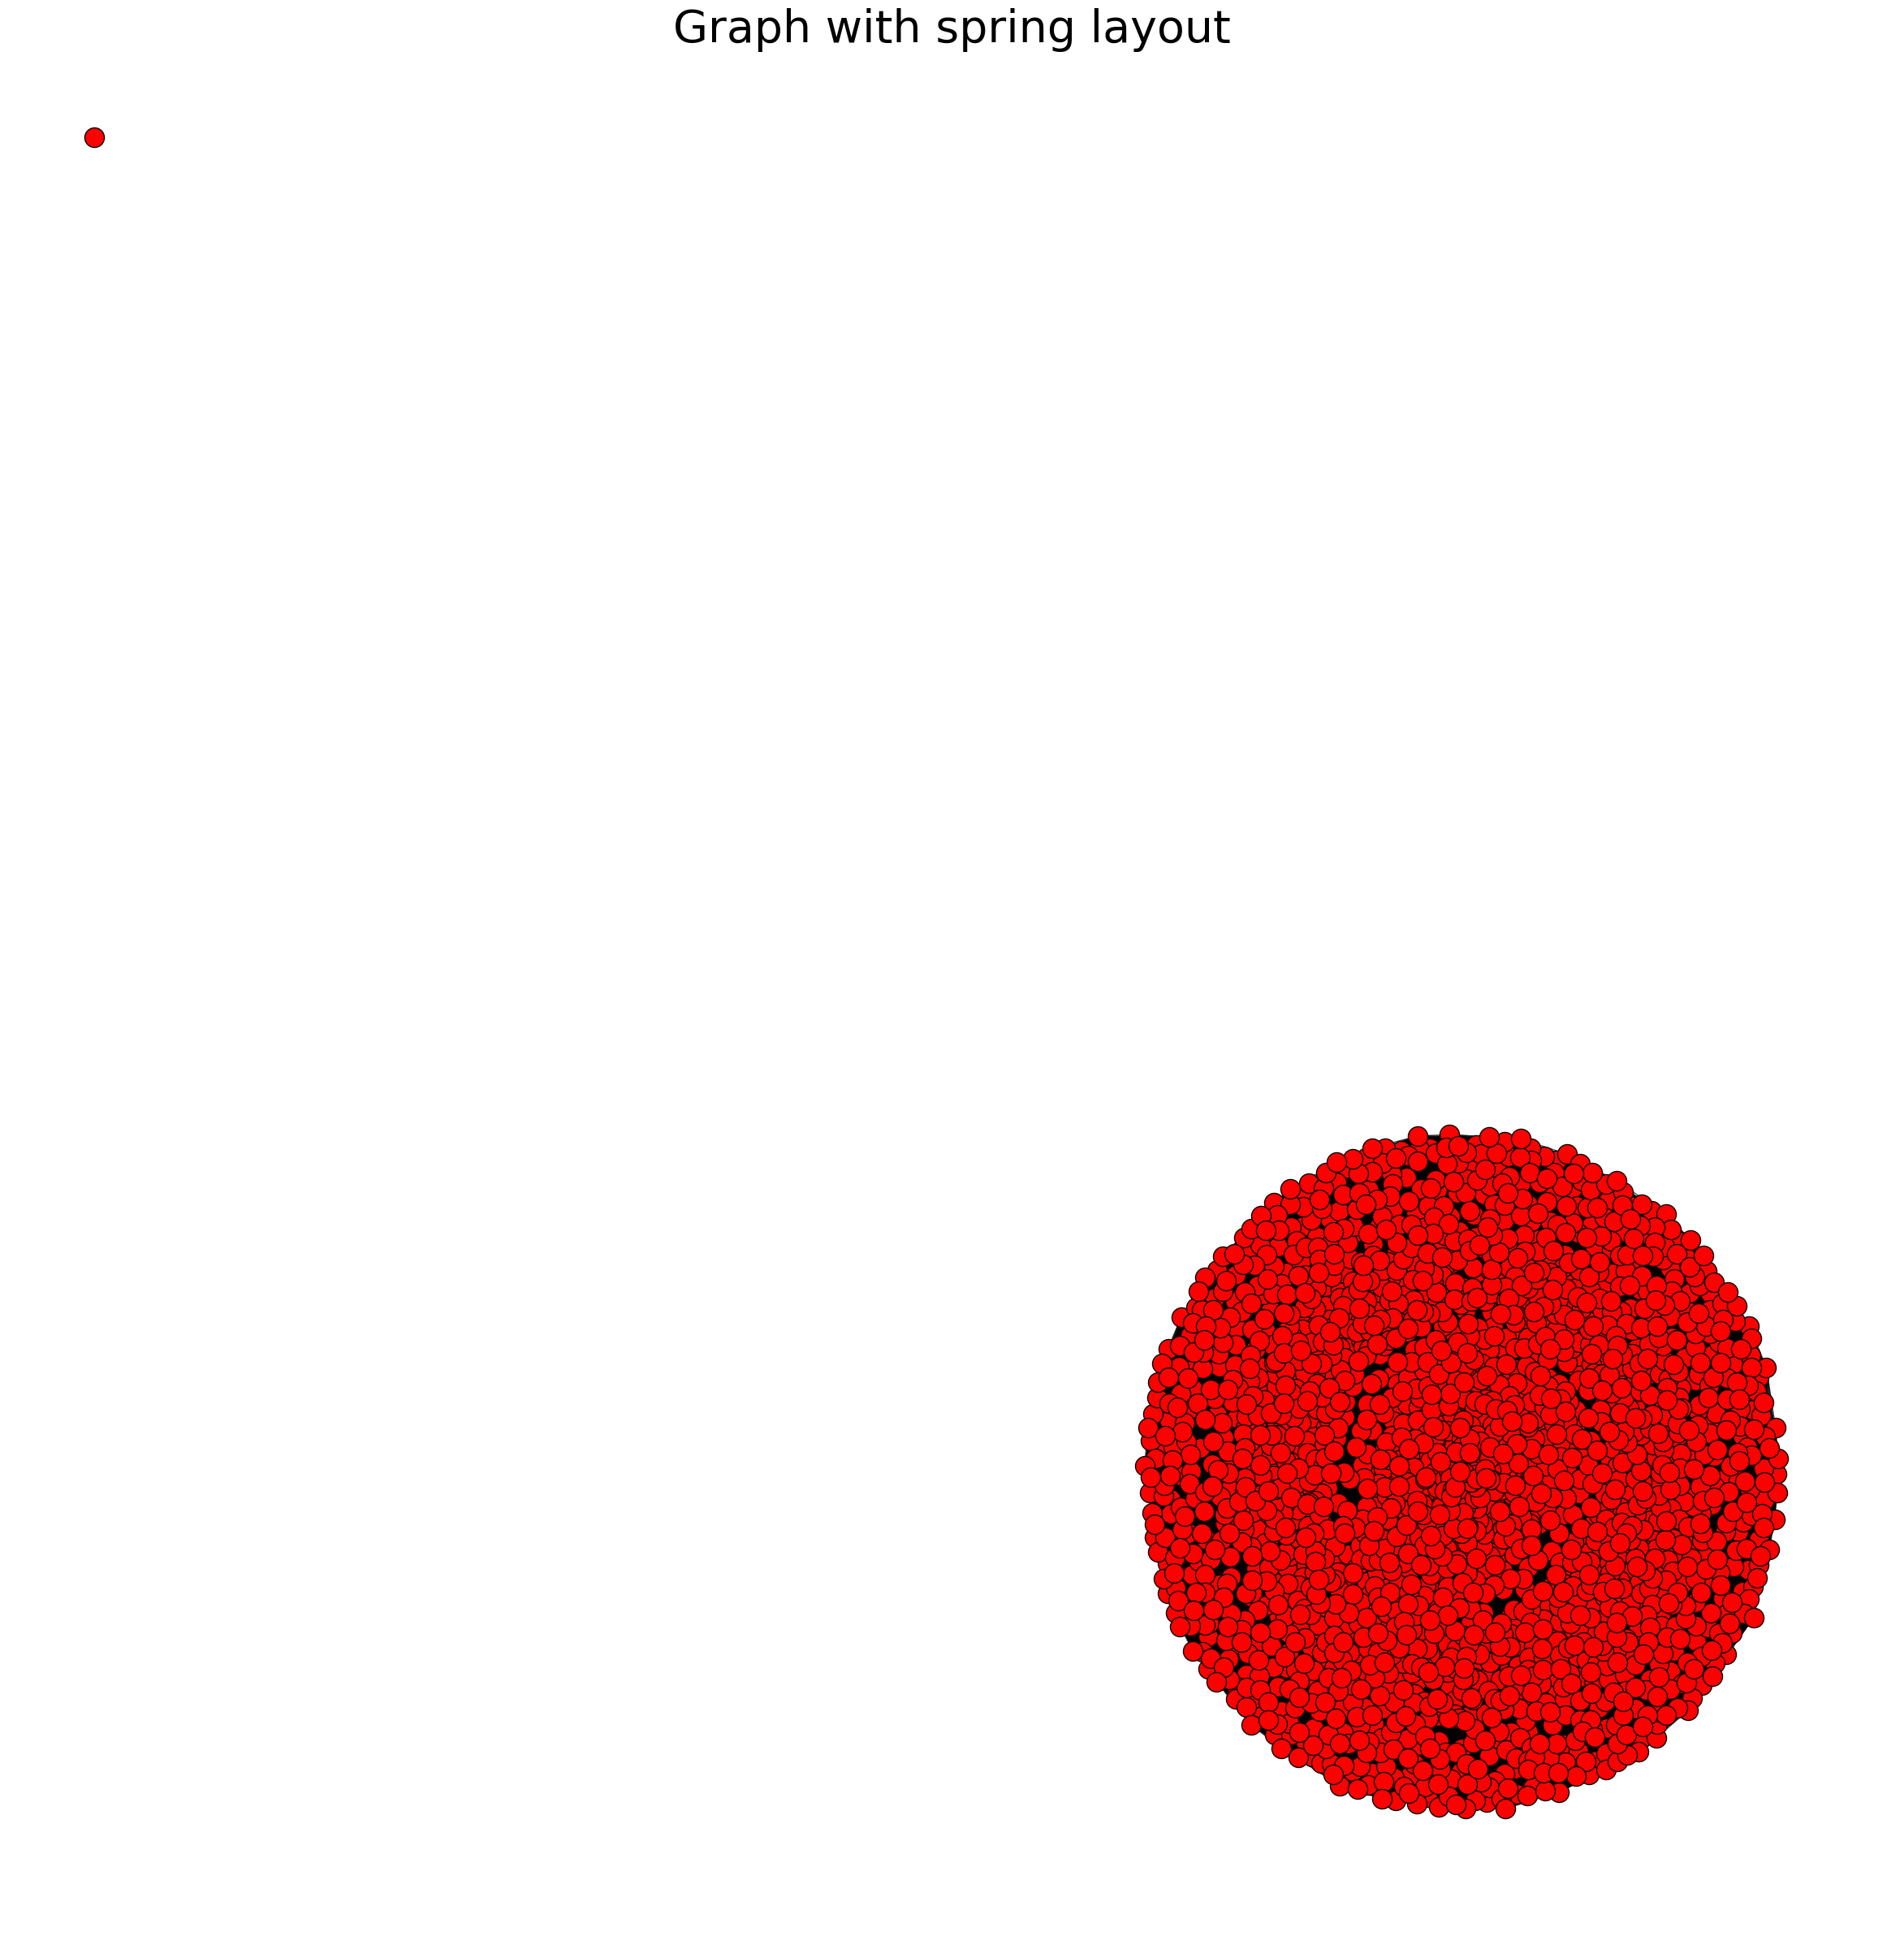

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

# ... (código para construir el grafo G)

plt.figure(figsize=(30, 30))
spring_layout = nx.spring_layout(G, seed=42)

nx.draw_networkx_nodes(G, spring_layout, node_color='r', edgecolors='k')
nx.draw_networkx_edges(G, spring_layout, alpha=0.7)

plt.title('Graph with spring layout', fontdict={'fontsize': 40})
plt.axis('off')
plt.show()

In [38]:
numero_nodos = G.number_of_nodes()
numero_enlaces = G.number_of_edges()
print("Número de enlaces:", numero_enlaces)
print("Número de nodos:", numero_nodos)


Número de enlaces: 2496495
Número de nodos: 2236


In [39]:
# Eliminar aristas que son bucles
self_loop_edges = list(nx.selfloop_edges(G))
G.remove_edges_from(self_loop_edges)

# Mostrar información básica sobre el grafo
print("Número de nodos:", G.number_of_nodes())
print("Número de aristas:", G.number_of_edges())


Número de nodos: 2236
Número de aristas: 2496495


In [40]:
import numpy as np
import networkx as nx

# Crear una matriz de adyacencia a partir del grafo G
adj_matrix = nx.adjacency_matrix(G).todense()

# Mostrar la matriz de adyacencia
print(adj_matrix)


[[0.00000000e+00 4.40539928e-04 1.72460989e-04 ... 5.05197646e-05
  1.43155641e-04 3.55375407e-04]
 [4.40539928e-04 0.00000000e+00 6.75623313e-05 ... 3.35179623e-04
  8.48059086e-05 4.71739178e-06]
 [1.72460989e-04 6.75623313e-05 0.00000000e+00 ... 1.07476280e-04
  1.93854450e-06 3.77333718e-05]
 ...
 [5.05197646e-05 3.35179623e-04 1.07476280e-04 ... 0.00000000e+00
  9.13723380e-05 2.63550634e-04]
 [1.43155641e-04 8.48059086e-05 1.93854450e-06 ... 9.13723380e-05
  0.00000000e+00 5.00114489e-05]
 [3.55375407e-04 4.71739178e-06 3.77333718e-05 ... 2.63550634e-04
  5.00114489e-05 0.00000000e+00]]


## creacion de la matriz de adyacencia

In [41]:
import numpy as np
import networkx as nx

# Crear una matriz de adyacencia a partir del grafo G
adj_matrix = nx.adjacency_matrix(G).todense()

# Mostrar la matriz de adyacencia
print(adj_matrix)


[[0.00000000e+00 4.40539928e-04 1.72460989e-04 ... 5.05197646e-05
  1.43155641e-04 3.55375407e-04]
 [4.40539928e-04 0.00000000e+00 6.75623313e-05 ... 3.35179623e-04
  8.48059086e-05 4.71739178e-06]
 [1.72460989e-04 6.75623313e-05 0.00000000e+00 ... 1.07476280e-04
  1.93854450e-06 3.77333718e-05]
 ...
 [5.05197646e-05 3.35179623e-04 1.07476280e-04 ... 0.00000000e+00
  9.13723380e-05 2.63550634e-04]
 [1.43155641e-04 8.48059086e-05 1.93854450e-06 ... 9.13723380e-05
  0.00000000e+00 5.00114489e-05]
 [3.55375407e-04 4.71739178e-06 3.77333718e-05 ... 2.63550634e-04
  5.00114489e-05 0.00000000e+00]]


In [42]:
import pandas as pd

# Suponiendo que tienes un DataFrame llamado df con tus datos
# Puedes cargar tus datos aquí o usar tu propio DataFrame

# Obtener la lista de nombres de columnas
columnas = df.columns.tolist()

# Mostrar las características una por una
for columna in columnas:
    print(columna)


Education
Income
Kidhome
Teenhome
Recency
Wines
Fruits
Meat
Fish
Sweets
Gold
NumDealsPurchases
NumWebPurchases
NumCatalogPurchases
NumStorePurchases
NumWebVisitsMonth
AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Complain
Response
Age_on_2014
Spent
Living_with
Children
Family_size
Is_parent


In [43]:
import pandas as pd

# Suponiendo que tienes un DataFrame llamado df con tus datos
# Puedes cargar tus datos aquí o usar tu propio DataFrame

# Seleccionar las columnas de características
columnas_caracteristicas = ['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 
                            'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 
                            'Gold', 'NumDealsPurchases', 'NumWebPurchases', 
                            'NumCatalogPurchases', 'NumStorePurchases', 
                            'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 
                            'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 
                            'Complain', 'Response', 'Age_on_2014', 'Spent', 
                            'Living_with', 'Children', 'Family_size', 'Is_parent']

# Crear un DataFrame solo con las columnas seleccionadas
df_caracteristicas = df[columnas_caracteristicas]

# Mostrar el DataFrame de características
print(df_caracteristicas)


      Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0             0  58138.0        0         0       58    635      88   546   
1             0  46344.0        1         1       38     11       1     6   
2             0  71613.0        0         0       26    426      49   127   
3             0  26646.0        1         0       26     11       4    20   
4             1  58293.0        1         0       94    173      43   118   
...         ...      ...      ...       ...      ...    ...     ...   ...   
2235          0  61223.0        0         1       46    709      43   182   
2236          1  64014.0        2         1       56    406       0    30   
2237          0  56981.0        0         0       91    908      48   217   
2238          1  69245.0        0         1        8    428      30   214   
2239          1  52869.0        1         1       40     84       3    61   

      Fish  Sweets  ...  AcceptedCmp1  AcceptedCmp2  Complain  Response  \


In [44]:
# Verificar el número de nodos en el grafo
num_nodos_grafo = len(G.nodes)

# Verificar el número de filas en la matriz de adyacencia
num_filas_matriz = adj_matrix.shape[0]

# Verificar el número de filas en el vector de características
num_filas_caracteristicas = df_caracteristicas.shape[0]

# Imprimir los resultados
print("Número de nodos en el grafo:", num_nodos_grafo)
print("Número de filas en la matriz de adyacencia:", num_filas_matriz)
print("Número de filas en el vector de características:", num_filas_caracteristicas)


Número de nodos en el grafo: 2236
Número de filas en la matriz de adyacencia: 2236
Número de filas en el vector de características: 2236


In [51]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class GraphAttentionLayer(nn.Module):
    def __init__(self, in_features, out_features, dropout=0.6, alpha=0.2, concat=True):
        super(GraphAttentionLayer, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.dropout = dropout
        self.alpha = alpha
        self.concat = concat

        self.W = nn.Parameter(torch.zeros(size=(in_features, out_features)))
        nn.init.xavier_uniform_(self.W.data, gain=1.414)
        self.a = nn.Parameter(torch.zeros(size=(2*out_features, 1)))
        nn.init.xavier_uniform_(self.a.data, gain=1.414)

        self.leakyrelu = nn.LeakyReLU(self.alpha)
        self.dropout = nn.Dropout(self.dropout)

    def forward(self, input, adj):
        h = torch.mm(input, self.W)
        N = h.size()[0]

        a_input = torch.cat([h.repeat(1, N).view(N*N, -1), h.repeat(N, 1)], dim=1).view(N, -1, 2*self.out_features)
        e = self.leakyrelu(torch.matmul(a_input, self.a).squeeze(2))

        zero_vec = -9e15*torch.ones_like(e)
        attention = torch.where(adj > 0, e, zero_vec)
        attention = F.softmax(attention, dim=1)
        attention = self.dropout(attention)

        h_prime = torch.matmul(attention, h)
        if self.concat:
            return F.elu(h_prime)
        else:
            return h_prime

class GAT(nn.Module):
    def __init__(self, n_features, n_hidden):
        super(GAT, self).__init__()
        self.attention = GraphAttentionLayer(n_features, n_hidden)

    def forward(self, x, adj):
        x = F.elu(self.attention(x, adj))
        return x

# Utilizar tus matrices de características y de adyacencia
matriz_caracteristicas_gat = torch.randn(df_caracteristicas.shape[0], df_caracteristicas.shape[1])  # Tu matriz de características
adj_matrix_gat = torch.tensor(adj_matrix, dtype=torch.float)  # Tu matriz de adyacencia

# Construir y entrenar el modelo GAT
num_features = matriz_caracteristicas_gat.shape[1]
model = GAT(num_features,32)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Entrenamiento
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(matriz_caracteristicas_gat, adj_matrix_gat)
    loss = torch.mean(output)
    loss.backward()
    optimizer.step()

# Obtener los vectores de características para todos los nodos
with torch.no_grad():
    output = model(matriz_caracteristicas_gat, adj_matrix_gat)
    print("Vectores de características:", output)

# Verificar el número de vectores obtenidos
num_vectors = output.shape[0]
print("Número de vectores de características obtenidos:", num_vectors)




Vectores de características: tensor([[-0.6294, -0.6198, -0.6305,  ..., -0.6286, -0.6224, -0.6284],
        [-0.6249, -0.6053, -0.6254,  ..., -0.6223, -0.6169, -0.6233],
        [-0.6291, -0.6230, -0.6296,  ..., -0.6299, -0.6263, -0.6298],
        ...,
        [-0.6308, -0.6295, -0.6308,  ..., -0.6315, -0.6308, -0.6306],
        [-0.6297, -0.6282, -0.6316,  ..., -0.6314, -0.6287, -0.6310],
        [-0.6297, -0.6242, -0.6288,  ..., -0.6306, -0.6259, -0.6255]])
Número de vectores de características obtenidos: 2236


Estos embeddings son útiles para representar la estructura y las relaciones entre los nodos en un espacio de dimensionalidad reducida, lo que puede ser beneficioso para tareas como clustering, visualización y análisis de similitud entre nodos.


In [52]:
emb_df = pd.DataFrame(output.numpy())
print(emb_df.head())


         0         1         2         3         4         5         6   \
0 -0.629375 -0.619768 -0.630520 -0.627188 -0.626137 -0.630237 -0.629168   
1 -0.624852 -0.605322 -0.625443 -0.613475 -0.593894 -0.623620 -0.612424   
2 -0.629143 -0.622973 -0.629638 -0.625914 -0.620341 -0.629986 -0.627270   
3 -0.630728 -0.625968 -0.630690 -0.629532 -0.626945 -0.631474 -0.630871   
4 -0.590040 -0.565475 -0.616833 -0.583413 -0.593973 -0.612953 -0.590932   

         7         8         9   ...        22        23        24        25  \
0 -0.623237 -0.626351 -0.626876  ... -0.630417 -0.631279 -0.629348 -0.628103   
1 -0.620467 -0.612193 -0.619553  ... -0.626895 -0.628937 -0.623727 -0.619444   
2 -0.627686 -0.625557 -0.627764  ... -0.630462 -0.631252 -0.628988 -0.629044   
3 -0.628628 -0.629801 -0.630635  ... -0.631277 -0.631875 -0.630973 -0.630108   
4 -0.578756 -0.577151 -0.581316  ... -0.611199 -0.608571 -0.588753 -0.595430   

         26        27        28        29        30        31  
0 -0

El resultado es un DataFrame emb_df que contiene los embeddings de nodos en el espacio de dimensionalidad 16, donde cada fila representa un nodo y cada columna representa una dimensión del embedding.

Este DataFrame es útil para realizar análisis, visualizaciones y aplicar algoritmos de aprendizaje automático en el espacio de embedding. Puedes ver las primeras filas de emb_df con el método .head() para obtener una vista previa de los embeddings generados para algunos nodos específicos.


In [53]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd

# Reducir la dimensionalidad con PCA
pca = PCA(n_components=2)  # Especifica el número de componentes principales deseados
emb_df_pca = pca.fit_transform(emb_df)

# Aplicar K-Means clustering
num_clusters = 3  # Número de clusters deseado
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(emb_df_pca)

# Obtener las etiquetas de cluster asignadas a cada muestra
cluster_labels = kmeans.labels_

# Agregar las etiquetas de cluster al DataFrame original
emb_df['cluster_label'] = cluster_labels

# Mostrar el resultado
print(emb_df[['cluster_label']])


      cluster_label
0                 0
1                 0
2                 0
3                 0
4                 0
...             ...
2231              0
2232              0
2233              0
2234              0
2235              0

[2236 rows x 1 columns]


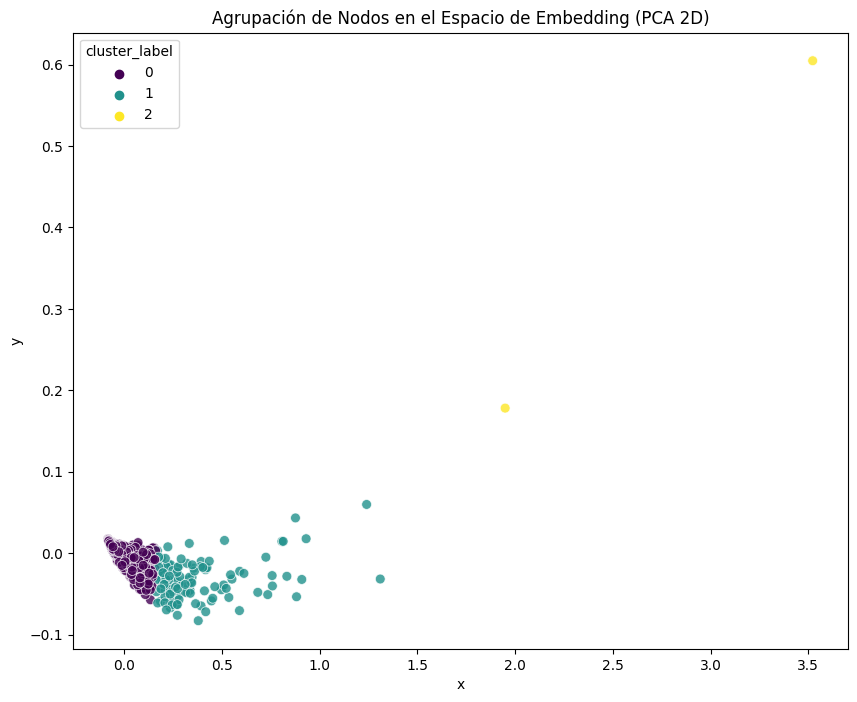

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2 dimensiones utilizando PCA
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(emb_df.iloc[:, :-1])  # Excluyendo la columna de etiquetas de cluster

# Agregar las etiquetas de cluster al DataFrame reducido
emb_2d_df = pd.DataFrame(emb_2d, columns=['PC1', 'PC2'])
emb_2d_df['cluster_label'] = emb_df['cluster_label'].values  # Usar .values para obtener los valores reales

# Cambiar los nombres de las columnas para simplificar
emb_2d_df.columns = ['x', 'y', 'cluster_label']

# Graficar los nodos en el espacio de embedding reducido
plt.figure(figsize=(10, 8))
sns.scatterplot(x='x', y='y', hue='cluster_label', palette='viridis', data=emb_2d_df, s=50, alpha=0.8)
plt.title('Agrupación de Nodos en el Espacio de Embedding (PCA 2D)')
plt.show()


In [55]:
from sklearn.metrics import silhouette_score

# Calcular el coeficiente de la silueta
silhouette_avg = silhouette_score(emb_2d, emb_2d_df['cluster_label'])
print("Coeficiente de la Silueta:", silhouette_avg)

Coeficiente de la Silueta: 0.8067769


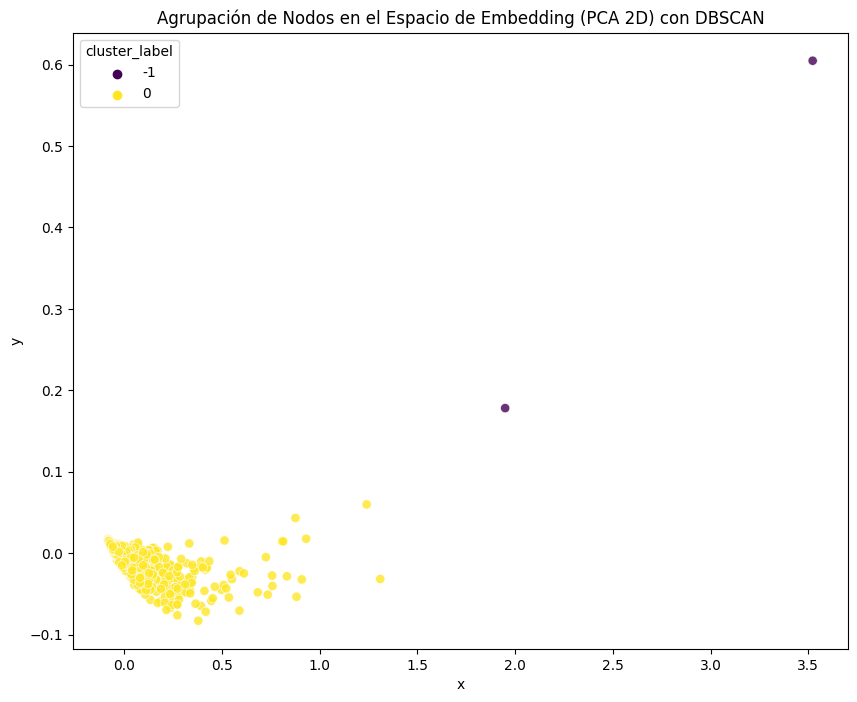

In [56]:
from sklearn.cluster import DBSCAN

# Crear un objeto DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=3)

# Ajustar el modelo DBSCAN al espacio de embedding reducido
clusters = dbscan.fit_predict(emb_2d)

# Agregar las etiquetas de cluster al DataFrame reducido
emb_2d_df['cluster_label'] = clusters

# Graficar los nodos en el espacio de embedding reducido
plt.figure(figsize=(10, 8))
sns.scatterplot(x='x', y='y', hue='cluster_label', palette='viridis', data=emb_2d_df, s=45, alpha=0.8)
plt.title('Agrupación de Nodos en el Espacio de Embedding (PCA 2D) con DBSCAN')
plt.show()
